# Introduction to Statistical Learning 
Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani is considered a canonical text in the field of statistical/machine learning and is an absolutely fantastic way to move forward in your analytics career. [The text is free to download](http://www-bcf.usc.edu/~gareth/ISL/) and an [online course by the authors themselves](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about) is currently available in self-pace mode, meaning you can complete it any time. Make sure to **[REGISTER FOR THE STANDFORD COURSE!](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about)** The videos have also been [archived here on youtube](http://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/).

In [1]:
ls data

Advertising.csv* carseats.csv     khan_xtrain.csv  portfolio.csv
Credit.csv       college.csv      khan_ytest.csv   smarket.csv
auto.csv         default.csv      khan_ytrain.csv  usarrests.csv
boston.csv       hitters.csv      nci60_data.csv   wage.csv*
caravan.csv      khan_xtest.csv   nci60_labs.csv   weekly.csv


# Chapter 8: Tree Based Methods
The fan favorite decision tree and its family the random forest and the kaggle champion gradient boosted tree will be discussed in this chapter. Decision trees are simple, easy to interpret and can give very good results when bagged and boosted.

## Decision Trees
Can be applied to both regression and classification. Decision trees are graphics where you can start at the "root" and traverse your way down by making decisions at the "branches" before finally ending up at a "leaf" that gives you the prediction. 

![tree image](http://image.slidesharecdn.com/decisiontree-151015165353-lva1-app6892/95/classification-using-decision-tree-12-638.jpg?cb=1444928106)

The book describes two general steps for building a (regression) decision tree
1. Divide the predictor space into j number of regions
2. For each region, find the mean response and use it as the predicted value. This will minimize the squared error for that region.

The regions in theory can be divided in any crazy manner you choose but in practice, they are divided into high dimensional rectangles. See image 8.1 from the book. For example, you could have used a line with a non-zero slope to partition the region below to get a more accurate fit, but simplicity wins here and we just split on horizontal and vertical lines - "high dimensional rectangles"

![rectangle](../images/decision.png)

### How do we get the branches?
We could try and just build every single tree imaginable and find the tree with the lowest squared error but this is computationally infeasible even for a relatively small number of predictors. Instead, a greedy approach is used by building the tree one branch at a time. The first branch is constructed by testing out many different binary splits of the data. 

For example, $X_1 < 5$ and  $X_1 >= 5$ would be one potential split. $X_2 = YES$ and  $X_2 = NO$ could be another binary split. Whichever split yields the lowest squared error would be considered the best split and that split would be chosen for the first branch. This process now continues for each branch interactively until some stopping criteria is met (maximum number of branches, minimum number of observations in a certain branch, etc...).

### Tree Pruning
It is possible to build a decision tree so specific (one with so many branches) that each observation can be predicted exactly. This would be complete memorization, ie overfitting, of the data. Because we want to have the tree work with unseen data, we can prune the tree.

One strategy would be some have some threshold for stopping a branch from splitting - it must have decreased RSS by a certain amount. Since this might miss a good split deeper in the tree, pruning is preferred.

Pruning works by.... 
1. growing a very large tree and stopping only when a minimum number of observations are left in each branch.
2. At each stage during the growing process add a penalty term $\alpha|T|$ to RSS where |T| is the number of terminal nodes.
3. This will give a function that maps $\alpha$ to a particular subtree. So $\alpha = 0$ would map to the original huge tree and for example $\alpha = 5$ could map to a tree that with only half of the terminal nodes.

Choose $\alpha$ through cross validation by...
1. Splitting training data into K folds
2. Grow a large tree and apply the penalty term exactly as above (map each $\alpha$ to a particular subtree.)
3. evaluate each $\alpha$ (subtree) on the left-out fold
4. Average all the $\alpha$ (subtrees) for each iteration of the K-folds

Then use this $\alpha$ to choose the tree from above.

### Classification Trees
Predict at each node, the most commonly occurring class.

#### How to determine splits
Three different metrics can be used. First let $\hat{p}_{mk}$ be the proportion of region m with class k. Remember that there can be many classes not just 2.
1. Classification error rate: $1 - \underset{k}{max}(\hat{p}_{mk})$ (1 - the most common class)
2. Gini Index: $\sum\limits_{k=1}^{K}\hat{p}_{mk}(1 - \hat{p}_{mk})$
3. Cross Entropy: -$\sum\limits_{k=1}^{K}\hat{p}_{mk}log\hat{p}_{mk}$

Cross entropy and Gini are similar in that numbers close to 0 or 1 will yield low scores. Gini and Cross entropy take into account each class proportion while classification error rate only takes into account the highest occurring class


### Linear Model vs Trees
If the decision boundary is linear and not rectangular then linear models can perform better than trees but for highly non-linear decision boundaries then trees can perform better.

## Bagging
Bootstrap aggregation - a procedure for lowering variance of decision trees.
* Bootstrapping - taking repeated samples with replacement and using each sample as an input into a learning method  
* Aggregation - For Regression, average each prediction from each of these bootstrapped data sets. For classification, use majority vote

### Validation with Out-of-bag error
Each bootstrap sample will contain on average 2/3 of the data points (because of sampling with replacement). We can use the left over 1/3 as validation set and record errors for each point not in the sample.

### Variable Importance
The wonderful thing about decision trees is their ease of interpretability. Bagging reduces this tremendously since we are averaging decisions together. We can use the average amount of decrease in RSS/Gini-index that happens for each time a split happens with a particular predictor. Generally, those predictors that are used higher up in the trees will cause a more massive decrease in RSS/Gini-index

## Random Forests
Random Forests combine bagging with one additional feature - and that is to limit the features to split on at each node. Instead of being able to split the data on any feature, only a subset of the features are considered at each stage. A typical choice is the square root of the number of predictors. This ensures that the trees will look quite different and not nearly as correlated as bagged trees would be. This also makes the trees significantly 'dumber' as they can only split on whatever random predictors it gets.

## Boosting
Boosting can be used (like bagging) for many different learning algorithms. Trees are grown sequentially. Each tree is grown using information from a previous tree. Boosting learns slowly. A tree is fit to the *residuals* of the model and not the outcome Y. Each tree can be small with just a few terminal nodes. The new trees keep focusing on areas where the model performs poorly. For classification problems the log-odds are used to find the residuals.

Parameters to model, 
* B - the number of trees to fit
* d - the max number of terminal nodes for each tree
* $\lambda$ - learning parameter that determines how much weight to assign to each tree

Add up all trees (times $\lambda$) together to get final model.

### Ensemble of weak learners
Random forest and Boosted trees are two excellent algorithms that both use 'weak' learners. On their own each learner is quite terrible but when combined together with many, make them very powerful, more powerful than an expert in many cases.

# Questions
What would a decision tree look like for a regression problem with one variable that closely resembles a straight line

# Leo Breiman - Random Forest Creator
Excellent site and a fairly easy read: https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

# Extreme Gradient Boosting (XGBoost)
Winner of many kaggle competitions: See explanation of algorithm here: http://xgboost.readthedocs.io/en/latest/model.html#

# Extremely Random Trees
Random forests where only a random subset of the cutpoints are allowed. Choose the best cutpoint from that random set. http://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees

# Exercises

1. statistician or data scientist

            do you like measure theory
           /                          \
          yes                          no
          /                             \
        statistician                   would you like to code for more than 4 hours each day
                                       /            \
                                     yes            no
                                     /               \
       taken more than 5 machine learning courses?   statistician  
       /                              \
       yes                           no
       /                              \
       do you like big data?           are you a frequentist?
       /              \                       /          \
       yes            no                     yes          no
       |               |                      |            |
       data scientist  stats              statistician   data scientist

# 2. 
A sum of one depth trees are basis functions with indicator variables and a sum of basis functions is an additive model.

# 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#3
p1 = np.linspace(0.001, .9999, 1000)
p2 = 1 - p1

In [4]:
classification_error = 1 - np.column_stack((p1, p2)).max(axis=1)
gini = p1 * (1 - p1) + p2 * (1 - p2)
entropy = -(p1 * np.log(p1) + p2 * np.log(p2))

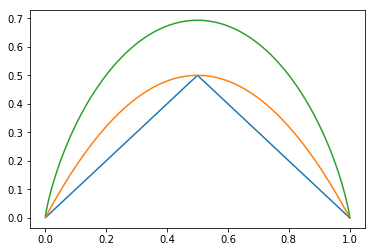

In [5]:
plt.plot(p1, classification_error)
plt.plot(p1, gini)
plt.plot(p1, entropy);

# 4a
      x1 > 1
       /  \
     x2 > 1  5
     /     \  
    x1 < 0  15 
    /      \
    x2>.5   3
    /   \
    0   10

# 4b

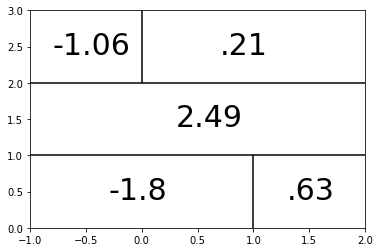

In [6]:
plt.xlim(-1, 2)
plt.ylim(0, 3)
plt.hlines(1, -1, 2)
plt.vlines(1, 0, 1)
plt.hlines(2, -1, 2)
plt.vlines(0, 2, 3)
plt.text(-.3, .4, "-1.8", fontsize=30)
plt.text(1.3, .4, ".63", fontsize=30)
plt.text(.3, 1.4, "2.49", fontsize=30)
plt.text(-.8, 2.4, "-1.06", fontsize=30)
plt.text(.7, 2.4, ".21", fontsize=30);

 # 5
 Majority vote: Choose Red     
 Non-red: 4 votes  
 red: 6 votes  
 

#### average probability
choose green (.45)

In [7]:
# average Probability Choose green
np.mean([.1, .15, .2, .2, .55, .6, .6,.65, .7, .75])

0.45000000000000001

# 6
For a regression tree, look through each feature and for each feature split the feature in two parts for each unique value of that feature and calcaulate RSS. Choose first split with lowest RSS. 

Now you have two nodes, repeat procedure until only a set number of observations are left in each node

# 7

In [8]:
import pandas as pd
boston = pd.read_csv('data/boston.csv')

In [9]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
X = boston.iloc[:, :-1]
y = boston['medv']

In [12]:
from collections import defaultdict

In [13]:
max_features_dict = defaultdict(list)

In [14]:
max_features = range(1, X.shape[1] + 1)
num_trees = [5, 10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

In [15]:
for mf in max_features:
    for nm in num_trees:
        clf = RandomForestRegressor(oob_score=True, max_features=mf, n_estimators=nm)
        clf.fit(X, y)
        max_features_dict[mf].append(clf.oob_score_)

/Users/Ted/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Ted/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Ted/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Ted/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some i

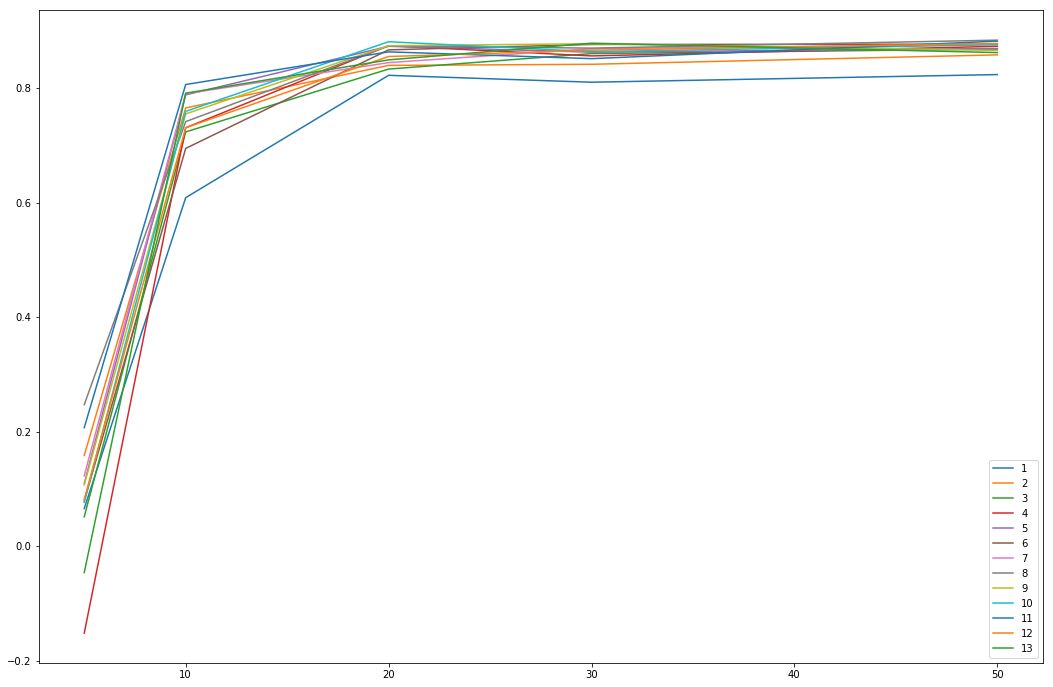

In [16]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
    plt.plot(num_trees[:5], values[:5], label=mf)
plt.legend(loc=4)

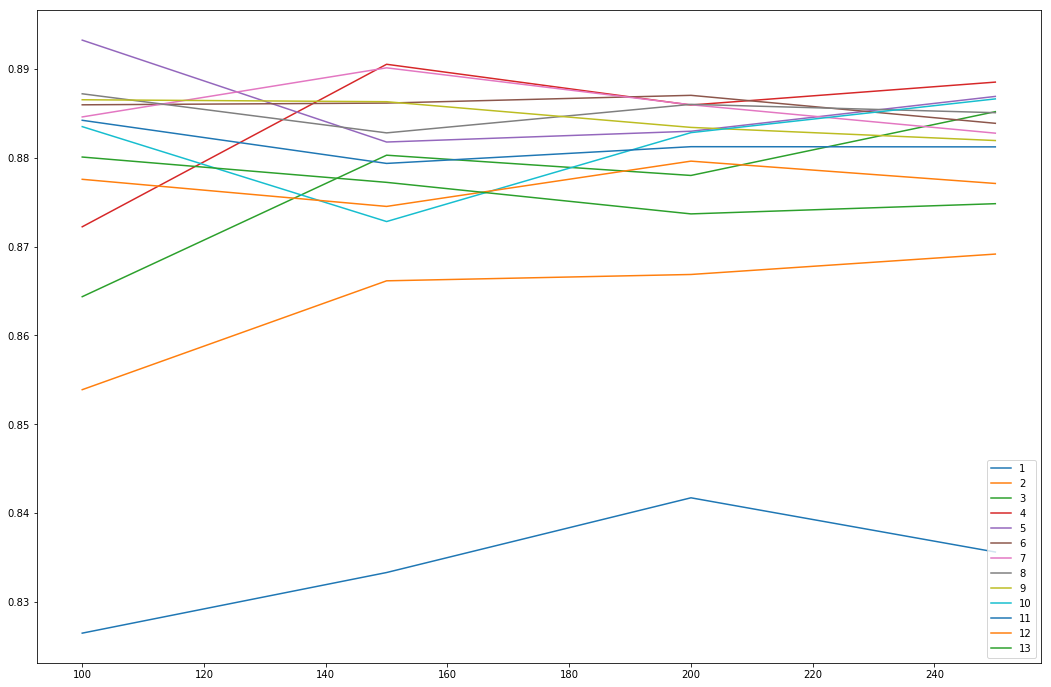

In [17]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
    plt.plot(num_trees[6:10], values[6:10], label=mf)
plt.legend(loc=4)

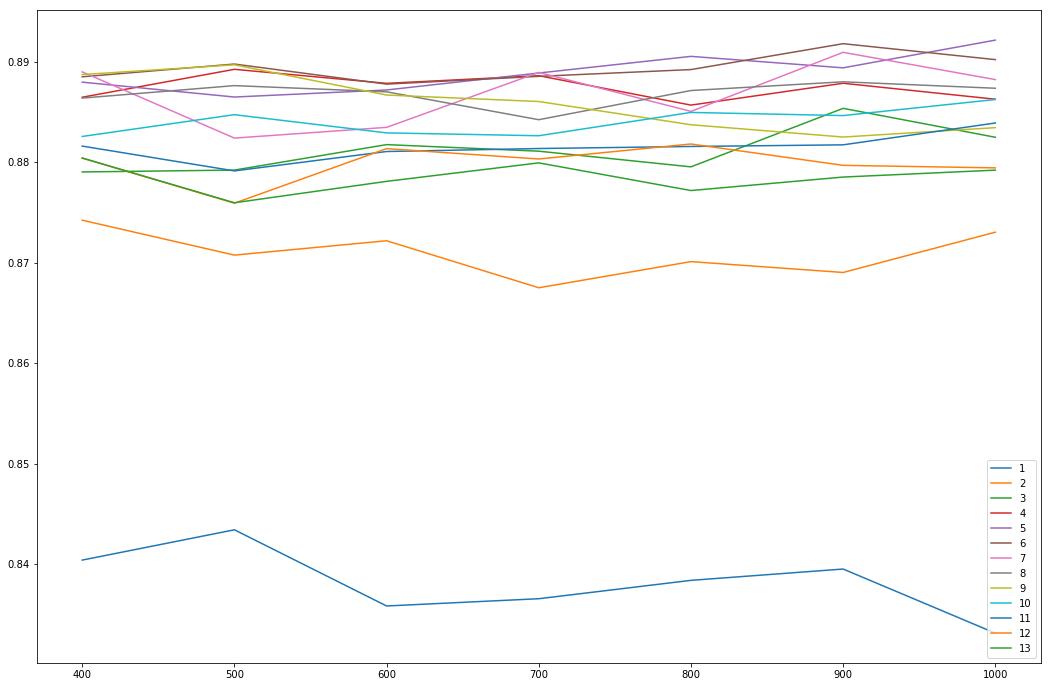

In [18]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
    plt.plot(num_trees[11:], values[11:], label=mf)
plt.legend(loc=4)

# Conclusion
Not much difference in R-squared after 20 trees and at least 3 predictor variables used at each node

In [19]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [20]:
clf = DecisionTreeRegressor()

In [21]:
carseats = pd.read_csv('data/carseats.csv')

In [22]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [23]:
carseats = pd.get_dummies(carseats, drop_first=True)

In [24]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [61]:
from sklearn.model_selection import train_test_split

In [26]:
X = carseats.iloc[:, 1:]
y = carseats['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [35]:
from IPython.display import Image

In [36]:
from sklearn.externals.six import StringIO  

In [37]:
import pydot
dot_data = StringIO()

In [38]:
export_graphviz(clf, out_file=dot_data)

In [39]:
dot_data

In [59]:
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png("images/carseats_tree.png") 

True

![image](images/carseats_tree.png)